# Quantum Teleportation qBraid Challenge
Quantum teleportation is a technique for transferring quantum information from a sender at one location to a receiver some distance away. 
In this challenge you and your team are tasked to develop a Quantum Teleportation circuit in Amazon Braket. You'll make the quantum teleportation circuit and then use our qBraid-SDK to transpile it to various other quantum computing languages and run it on some backends!

While not necessarily coding intensive, we'd like to see plenty of extensions

Before you get started make sure that:

- You've enabled your qBraid Amazon Braket account. `qbraid enable account qbraid_sdk`
- You've activated the qBraid-SDK environment and are using the qBraid-SDK Python 3 kernel (on the top right you should see **Python 3 [qBraid-SDK]**)
- *Please copy this file and rename it <team_name>\_quantum_teleportation.ipynb*- we'd like to avoid merge conflicts with other submissions!

## Submission Checklist
- Make sure to include a readme!
- Make sure you've run or queued your solution on a real quantum computer (Rigetti M-1 perferred)
- Get creative! We'd love to see extensions to this challenge, such as making a game, nice frontends, find interesting ways to use our sdk etc.

## Judging Criteria
- Your code must include a README.md which describes your implementation and includes how to run your solution.
- Your code should be documented and easy to understand!
- There are plenty of implementations on the web to guide you in better understanding Quantum Teleporation. Feel free to use them as guidance, but do code your solutions with as few out of box solutions 
    ie don't `from some_package import QuantumTeleportation`
- Your code must run a job on real hardware using the qBraid Amazon Braket Account.



## Challenge description
- Implement a quantum telporation circuit and measure the results on a real quantum computer.
- Use the qBraid-SDK to transpile the circuit to various other languages and run it on simulators and available hardware (assuming you have an account/it is accessible to you)
- Come up with creative ways to embellish on this challenge!

## qBraid-SDK demo
We will provide a quick demo of the SDK here, but please also refer to the two notebooks to see how the SDK can be used to transpile your circuit

In [2]:
#We modified the "Getting started with Amazon Braket" and "Enable account to access Braket QPUs" demos in order 
#to create and measure outputs from a circuit that uses two EPR pairs (shared between wires 0 and 1, and 
# 2 and 3) and teleportation to create an EPR pair between wires 3 and 0.

!qbraid enable account aws_braket

# for the qbraid_sdk run the following command
#  in your terminal or in the notebook
!qbraid enable account qbraid_sdk

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
#from braket.devices import rigetti
from braket.aws import AwsDevice, AwsQuantumTask
import matplotlib.pyplot as plot

 You have already enabled quantum jobs to be submitted with qBraid.
 You have already enabled quantum jobs to be submitted with qBraid.


In [3]:
# create the circuit
bell1 = Circuit().h(0).cnot(0, 1)
bell2 = bell1.h(2).cnot(2, 3)
next_stage = bell2.cnot(1,2)
final_stage = next_stage.h(1).cnot(2,3).cz(1,3)
print(final_stage)

T  : |0|1|2|3|4|
                
q0 : -H-C-------
        |       
q1 : ---X-C-H-C-
          |   | 
q2 : -H-C-X-C-|-
        |   | | 
q3 : ---X---X-Z-

T  : |0|1|2|3|4|


In [4]:
# the name of the bucket
my_bucket = "example-bucket"
# the name of the folder in the bucket
my_prefix = "example-folder"
s3_folder = (my_bucket, my_prefix)

In [5]:
# choose the cloud-based managed simulator to run your circuit
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
#device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1')

# execute the circuit
task = device.run(final_stage, s3_folder, shots=1000)
# display the results
counts = task.result().measurement_counts
print(counts)

Counter({'1111': 150, '0000': 140, '1001': 126, '0100': 125, '1011': 121, '0010': 121, '0110': 109, '1101': 108})


In [ ]:
device2 = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1')

# execute the circuit
task2 = device2.run(final_stage, s3_folder, shots=1000)
# display the results
counts2 = task2.result().measurement_counts
print(counts2)

Text(0.5, 1.0, 'Simulation Results')

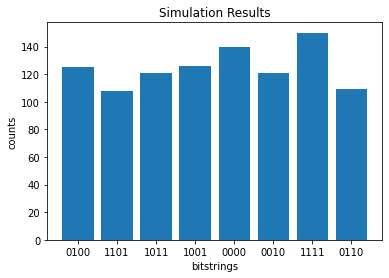

In [6]:
plot.bar(counts.keys(), counts.values())
plot.xlabel('bitstrings')
plot.ylabel('counts')
plot.title('Simulation Results')

In [ ]:
plot.bar(counts2.keys(), counts2.values())
plot.xlabel('bitstrings')
plot.ylabel('counts')
plot.title('Quantum Hardware Results')

In [3]:
# # run circuit 
# rigetti_task = rigetti.run(final_stage, shots=1000)

# # get id and status of submitted task
# rigetti_task_id = rigetti_task.id
# rigetti_status = rigetti_task.state()
# # print('ID of task:', rigetti_task_id)
# print('Status of task:', rigetti_status)

NameError: name 'rigetti' is not defined

In [ ]:
# # print status
# !qbraid credits
# status = rigetti_task.state()
# print('Status of (reconstructed) task:', status)

## References
https://en.wikipedia.org/wiki/Quantum_teleportation

Furusawa, Akira. (2005). Quantum teleportation and its applications. 10.1117/12.572740. 